In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure.format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error , silhouette_score


In [4]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

### Dataset Creation

In [5]:
X, y = make_blobs(n_features = 50, centers= 20, n_samples= 2000, 
                  cluster_std= 0.2, center_box = [-1,1], random_state= 17)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, 
                                                    random_state = 17)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Base Line model

In [7]:
pca = PCA(n_components= 2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

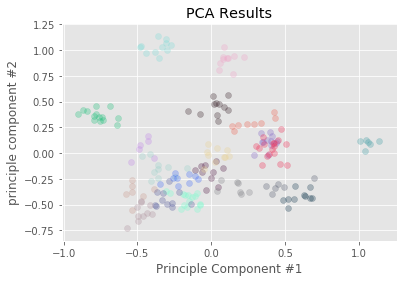

In [8]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels ):
  X_data = res_pca[y_test == unique_label]

  plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c = cols[index])

plt.xlabel('Principle Component #1')
plt.ylabel('principle component #2')
plt.title('PCA Results')

### Autoencoders

In [9]:
autoencoder = MLPRegressor(alpha = 1e-15,
                           hidden_layer_sizes = (50, 100, 50 , 2, 50 ,100, 50),
                           random_state = 1, max_iter = 20000
                           )
autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [10]:
#Reducing Dimensionality
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [11]:
for w in W:
  print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [12]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [13]:
def encode(encoder_weights, encoder_biases, data):
  res_ae = data
  for index, (w,b) in enumerate(zip(encoder_weights, encoder_biases)):
    if index + 1 == len(encoder_weights):
      res_ae = res_ae@w+b
    else:

      res_ae = np.maximum(0, res_ae@w+b)
  return res_ae

res_ae = encode(encoder_weights, encoder_biases, X_test)

Text(0.5, 1.0, 'Autoencoder Results')

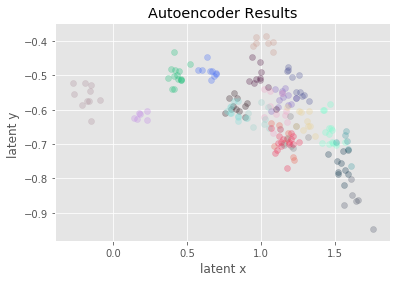

In [14]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
  latent_space = res_ae[y_test ==  unique_label]

  plt.scatter(latent_space[:,0], latent_space[:,1], alpha = 0.3, c = cols[index])
plt.xlabel('latent x')
plt.ylabel('latent y ')
plt.title('Autoencoder Results')

In [15]:
silhouette_score(X_test, y_test)

0.6025834055135814

In [16]:
silhouette_score(res_pca, y_test)

0.3366537849185868

In [17]:
silhouette_score(res_ae, y_test)

0.2151238416947765